In [1]:
import incense
import config.params as config
from utils_analysis import plot_exp, print_system, load_json_data
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import numpy as np

ext = ".png"
# Folder and file name for saving images and JSON data
save_folder = "images/"


In [2]:
loader = incense.ExperimentLoader(mongo_uri=config.mongo_uri, db_name="fit_data_test")

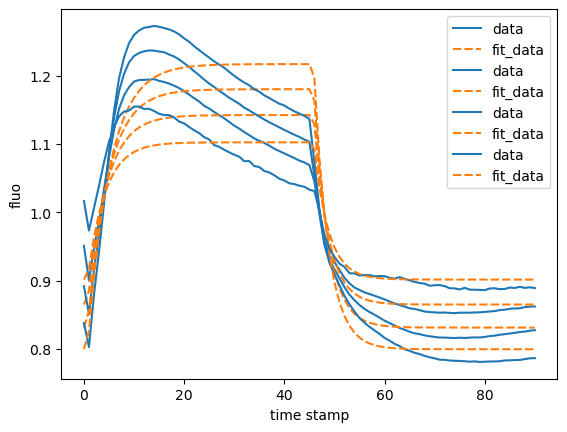

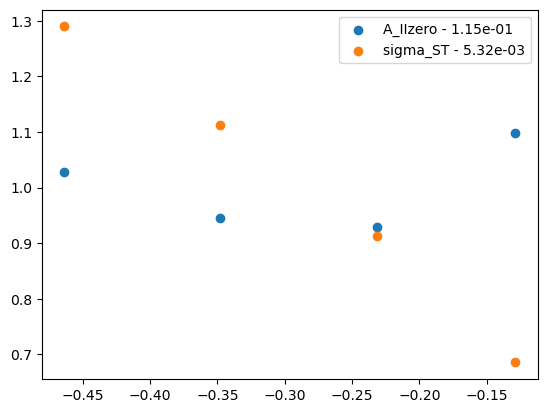

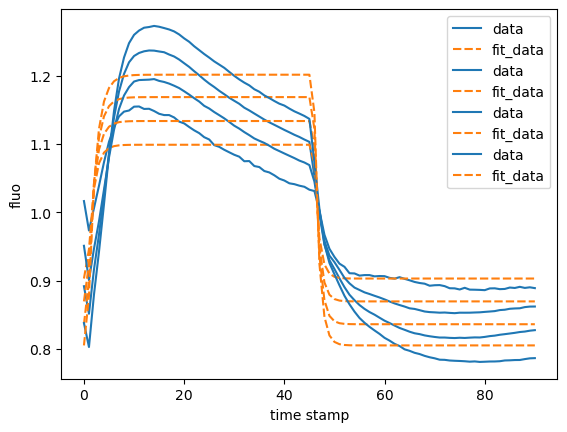

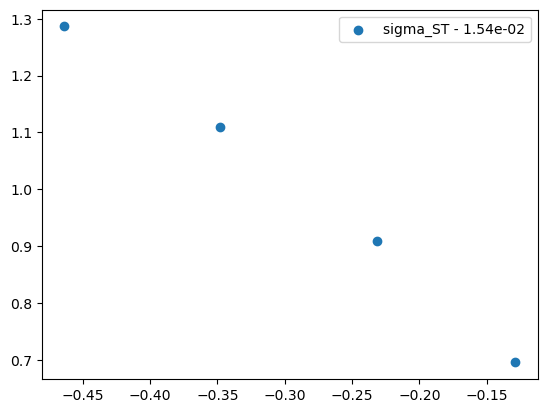

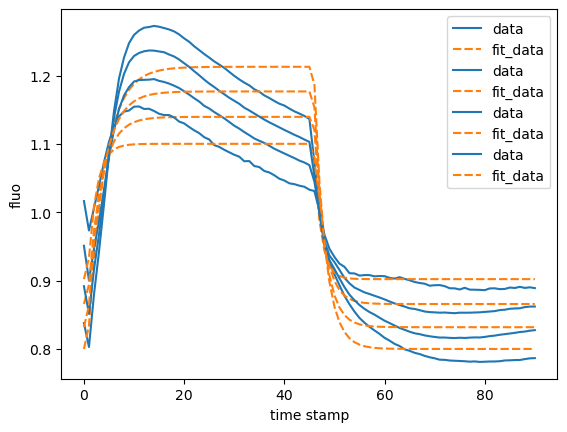

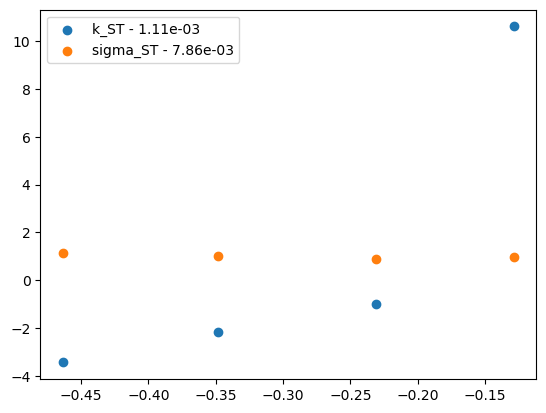

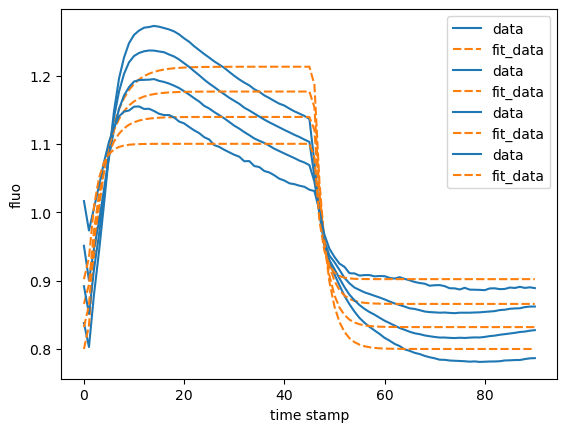

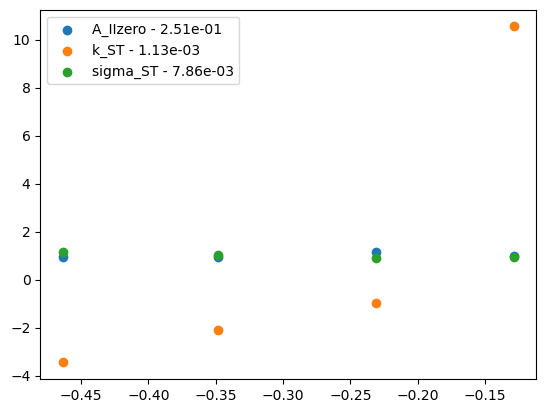

In [3]:
dict_data = {"qT_1eq_2a_params": [4, 5, 6, 7],
             "qT_1eq_1a_params": [25, 26, 27, 28],
             "qT_1eq_2b_params": [29, 30, 31, 32],
             "qT_1eq_3b_params": [33, 34, 35, 36],
             
            }
# Indices for fluorescence data
v0, v1 = 0, 8

for key in dict_data:
    plot_exp(dict_data[key], v0, v1, save_folder, key, ext, loader)

[[0.0020642317216475283, 0.0010299147980433966, 0.0014479405271497479, 0.002857646611657093], [0.0012710069546068368, 0.0016029986355509454, 0.0018702254328018598, 0.001311200924696781], [0.0016299084180102755, 0.001084176537781908, 0.0009949333645146248, 0.0013683712480118942], [0.0016298862818733993, 0.0010841594381600132, 0.0013683628861260962, 0.0009949326196048635]]


C:\Users\Alienor\AppData\Local\Temp\ipykernel_15584\1547591028.py:16: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sb.pointplot(x = np.concatenate(file_names), y =np.concatenate(errors), join=False)


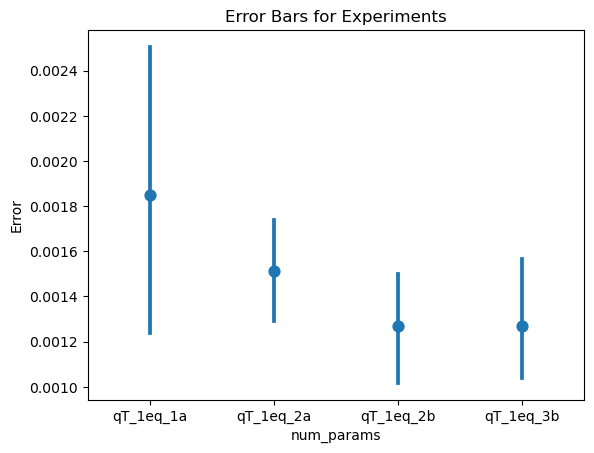

In [4]:

json_files = glob.glob("images/*.json")

def plot_error_bars(json_files):
    """Fetch all JSON files and plot the error bars."""
    
    errors = []
    file_names = []
    for json_file in json_files:
        data = load_json_data(json_file)
        errors.append(data['error'])
        fname = os.path.split(json_file)[1][:-12]
        file_names.append([fname]*len(data["error"]))
    print(errors)
    # Plot the error bars
    plt.figure()
    sb.pointplot(x = np.concatenate(file_names), y =np.concatenate(errors), join=False)

    
    plt.xlabel("num_params")
    plt.ylabel("Error")
    plt.title("Error Bars for Experiments")
    plt.show()

# Example usage
folder_path = "images/"
plot_error_bars(json_files)


In [5]:
json_files

['images\\qT_1eq_1a_params.json',
 'images\\qT_1eq_2a_params.json',
 'images\\qT_1eq_2b_params.json',
 'images\\qT_1eq_3b_params.json']

In [6]:
load_json_data(json_files[0])

{'npq': [-0.3483099078015629,
  -0.1287743567635895,
  -0.23130649781288107,
  -0.46357211594333436],
 'error': [0.0020642317216475283,
  0.0010299147980433966,
  0.0014479405271497479,
  0.002857646611657093],
 'sigma_ST': [0.017062499999999987,
  0.010687499999999982,
  0.013968749999999985,
  0.01978124999999999]}